In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tqdm.notebook import tqdm, trange
import hdf5plugin
import h5py
import time

In [27]:
!h5dump -H /asap3/petra3/gpfs/p11/2024/data/11018732/raw/scan_frames/Scan_51/Scan_51_data_000001.h5

HDF5 "/asap3/petra3/gpfs/p11/2024/data/11018732/raw/scan_frames/Scan_51/Scan_51_data_000001.h5" {
GROUP "/" {
   GROUP "entry" {
      ATTRIBUTE "NX_class" {
         DATATYPE  H5T_STRING {
            STRSIZE 8;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_ASCII;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      GROUP "data" {
         ATTRIBUTE "NX_class" {
            DATATYPE  H5T_STRING {
               STRSIZE 7;
               STRPAD H5T_STR_NULLTERM;
               CSET H5T_CSET_ASCII;
               CTYPE H5T_C_S1;
            }
            DATASPACE  SCALAR
         }
         DATASET "data" {
            DATATYPE  H5T_STD_U32LE
            DATASPACE  SIMPLE { ( 50, 4362, 4148 ) / ( H5S_UNLIMITED, 4362, 4148 ) }
            ATTRIBUTE "image_nr_high" {
               DATATYPE  H5T_STD_U64LE
               DATASPACE  SCALAR
            }
            ATTRIBUTE "image_nr_low" {
               DATATYPE  H5T_STD_U64LE
               D

In [28]:
!h5dump -H /asap3/petra3/gpfs/p11/2024/data/11018732/raw/server_log/Scan_logs/Scan_51.log

h5dump error: unable to open file "/asap3/petra3/gpfs/p11/2024/data/11018732/raw/server_log/Scan_logs/Scan_51.log"


In [249]:
scan_nr = 56
scanpath=f"/asap3/petra3/gpfs/p11/2024/data/11018732/raw/scan_frames/Scan_{scan_nr}"

In [250]:
# read in one h5 file for visualization and preliminary data check
dir_main = f'/asap3/petra3/gpfs/p11/2024/data/11018732/raw/scan_frames/Scan_{scan_nr}/'
file_name = dir_main+f'Scan_{scan_nr}_data_000001.h5'
with h5py.File(file_name,'r') as f:
    data_test = f['/entry/data/data'][:]

In [251]:
print(data_test.shape)

(100, 4362, 4148)


In [252]:
# data_test_std = np.std(data_test,axis=0)

In [253]:
# mask_test = np.ones_like(data_test[0])
# mask_test[np.where(data_test[0]>1e7)] = 0

In [254]:
# data_test_masked = data_test*mask_test

In [255]:
# # generate mask based on the statistics

# data_mean = np.mean(data_test,axis=0)
# data_std = np.std(data_test,axis = 0)
# data_med = np.median(data_test,axis=0)
# small_value = 0.01
# data_fluc = np.float64(data_mean/(data_std + small_value))



In [256]:
# mask_statistic = (data_mean<10) * (data_std > 0.1) 

# mask_statistic = mask_statistic.astype(bool)
# # mask_statistic = np.logical_not(mask_statistic)

In [257]:
# %matplotlib notebook
# plt.figure
# plt.subplot(131)
# plt.imshow(mask_statistic*data_test[22],vmax=1)
# plt.subplot(132)
# plt.imshow(data_mean*mask_test,vmax=1)

# plt.subplot(133)
# plt.imshow(data_std,vmax=1)

<IPython.core.display.Javascript object>


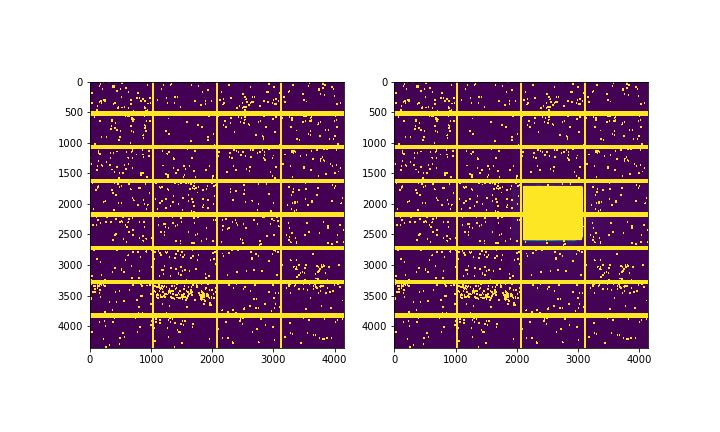

In [258]:
%matplotlib notebook
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(data_test[0],vmax=1000)
plt.subplot(122)
plt.imshow(data_test[1],vmax=1000)

<IPython.core.display.Javascript object>


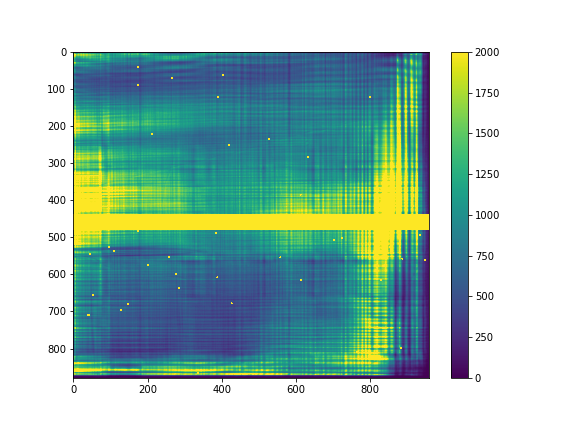

In [128]:
import matplotlib.animation as animation
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
i=0
im = plt.imshow(data_test[0,roi[0]:roi[1],roi[2]:roi[3]],animated=True,vmax=2000,vmin=0)
# plt.title(f'frame {i}')
plt.colorbar()

def updatefig(*args):
    global i
    if (i<48):
        i += 1
    else:
        i=0
#     plt.title(f'frame {i}')
    im.set_array(data_test[i,roi[0]:roi[1],roi[2]:roi[3]])
    return im,
ani = animation.FuncAnimation(fig, updatefig,  blit=True, frames=range(0,data_test.shape[0]))
# ani.save(f'scan_55_2.gif', writer=animation.PillowWriter(fps=10),dpi=150)
plt.show()

In [288]:
# if generate local mask, use this roi
roi = [2000,2600,2200,2900] 
mask = np.zeros(data_test.shape[1:])
mask[roi[0]:roi[1],roi[2]:roi[3]] = 1


#if generate a ring mask, use the following one
# x,y = np.meshgrid(np.linspace(0,data_test.shape[2],data_test.shape[2]),np.linspace(0,data_test.shape[1],data_test.shape[1]))

# x_c = 2164
# y_c = 2230

# x1 = 3075
# y1 = 935

# r = np.sqrt((x_c-x1)**2+(y_c-y1)**2)
# width = 100
# circle_1 = np.zeros(data_test.shape[1:])
# circle_2 = np.zeros(data_test.shape[1:])

# circle_1[(x-x_c)**2+(y-y_c)**2<(r+width)**2] = 1
# circle_2[(x-x_c)**2+(y-y_c)**2>(r-width)**2] = 1

# mask = circle_1*circle_2

In [289]:
data_test_mask = data_test[10,roi[0]:roi[1],roi[2]:roi[3]]
mask_badpixel = np.ones((np.shape(data_test_mask)[0],np.shape(data_test_mask)[1]))
mask_badpixel[data_test_mask>100000] = 0 

<IPython.core.display.Javascript object>


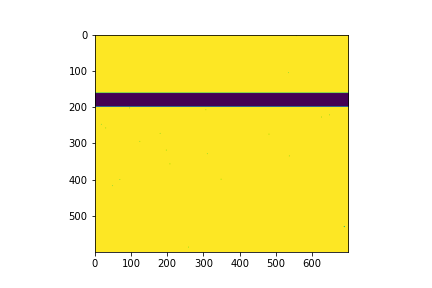

0.0


In [290]:
plt.figure()
plt.imshow(mask_badpixel)
print(np.min(mask_badpixel))

In [291]:

names = []
for filename in tqdm(sorted(os.listdir(scanpath))):
    if filename.endswith(".h5"):
        names.append(filename)
names = np.array(names[0:-1])
print(names,len(names))

  0%|          | 0/102 [00:00<?, ?it/s]

['Scan_56_data_000001.h5' 'Scan_56_data_000002.h5'
 'Scan_56_data_000003.h5' 'Scan_56_data_000004.h5'
 'Scan_56_data_000005.h5' 'Scan_56_data_000006.h5'
 'Scan_56_data_000007.h5' 'Scan_56_data_000008.h5'
 'Scan_56_data_000009.h5' 'Scan_56_data_000010.h5'
 'Scan_56_data_000011.h5' 'Scan_56_data_000012.h5'
 'Scan_56_data_000013.h5' 'Scan_56_data_000014.h5'
 'Scan_56_data_000015.h5' 'Scan_56_data_000016.h5'
 'Scan_56_data_000017.h5' 'Scan_56_data_000018.h5'
 'Scan_56_data_000019.h5' 'Scan_56_data_000020.h5'
 'Scan_56_data_000021.h5' 'Scan_56_data_000022.h5'
 'Scan_56_data_000023.h5' 'Scan_56_data_000024.h5'
 'Scan_56_data_000025.h5' 'Scan_56_data_000026.h5'
 'Scan_56_data_000027.h5' 'Scan_56_data_000028.h5'
 'Scan_56_data_000029.h5' 'Scan_56_data_000030.h5'
 'Scan_56_data_000031.h5' 'Scan_56_data_000032.h5'
 'Scan_56_data_000033.h5' 'Scan_56_data_000034.h5'
 'Scan_56_data_000035.h5' 'Scan_56_data_000036.h5'
 'Scan_56_data_000037.h5' 'Scan_56_data_000038.h5'
 'Scan_56_data_000039.h5' 'Scan

In [292]:
from multiprocessing import Pool
from itertools import repeat
def STXM(filename,scanpath):
    value_list = []
    f=h5py.File(scanpath +"/"+ filename,"r")
    data_current = f['/entry/data/data'][:,roi[0]:roi[1],roi[2]:roi[3]]
#     print(data_current.shape)
    for j in trange(np.shape(data_current)[0]):
        mask_badpixel = np.ones((np.shape(data_current)[1],np.shape(data_current)[2]))
        mask_badpixel[data_current[0]>100000] = 0 

        value = np.sum(np.sum(data_current[j,:,:]*mask_badpixel))
        value_list.append(value)
    return value_list



# value_list = []
# for name in names:
#     f=h5py.File(scanpath +"/"+ name,"r")
#     data_current = f['/entry/data/data'][:,roi[0]:roi[1],roi[2]:roi[3]]
    
#     for j in trange(np.shape(data_current)[0]):
#         value = np.sum(np.sum(data_current[j,:,:]*mask_badpixel))
#         value_list.append(value)
        

        
with Pool(50) as p:
    t1 = time.time()
    listing = np.array(p.starmap(STXM, zip(names, repeat(scanpath)))).flatten() 
    #listing = p.starmap(STXM, zip(names, repeat(scanpath)))
    t2 = time.time()
    t_diff = t2 - t1
print("Done, " + str(len(names)) + " lines took " + str(t_diff) + " seconds.")

Done, 101 lines took 32.319873094558716 seconds.


In [293]:
np.array(listing).shape

(10100,)

In [294]:
listing = np.reshape(listing,(100,101))

<IPython.core.display.Javascript object>


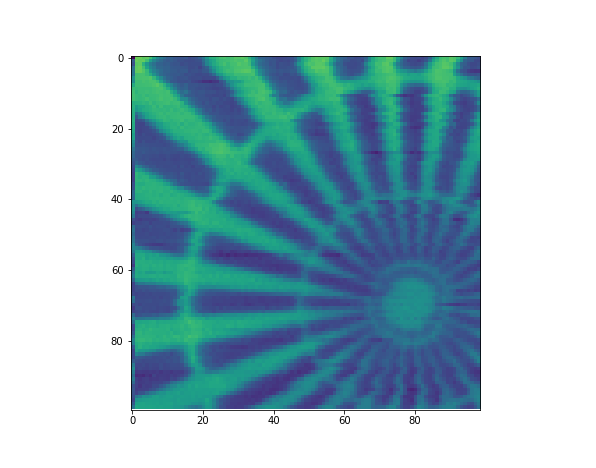

2196.0 6470854906.0


In [302]:
%matplotlib notebook
plt.imshow((listing[:,2:]),vmax=4e8,vmin=3e8)
plt.show()
print(np.min(listing),np.max(listing))